# Adding Synthetic Data to Dataset

In [12]:
import tensorflow as tf

import pathlib
import imageio
import numpy as np

import random

from PIL import Image, ImageDraw, ImageFont



print(tf.__version__)

tf.enable_eager_execution()

1.14.0


In [16]:
data_root = "./data/data_relabeled_png_synthetic//"

# load an array of image paths
def load_image_paths(path):
    
    data_root = pathlib.Path(path)
    
    paths = []
    
    for child in data_root.iterdir():
        if (child.is_dir() and child.name != ".DS_Store"):
            print(child)
            
            subdir_paths = list(child.glob('**/*'))
            subdir_paths = [str(path) for path in subdir_paths if path.name != ".DS_Store"]
        
            paths.append(subdir_paths)
    
    return paths

paths = load_image_paths(data_root)

data/data_relabeled_png_synthetic/0
data/data_relabeled_png_synthetic/1
data/data_relabeled_png_synthetic/2


data/data_relabeled_png_synthetic/0/IM-0025-0003-0001.dcm.png
(512, 512)


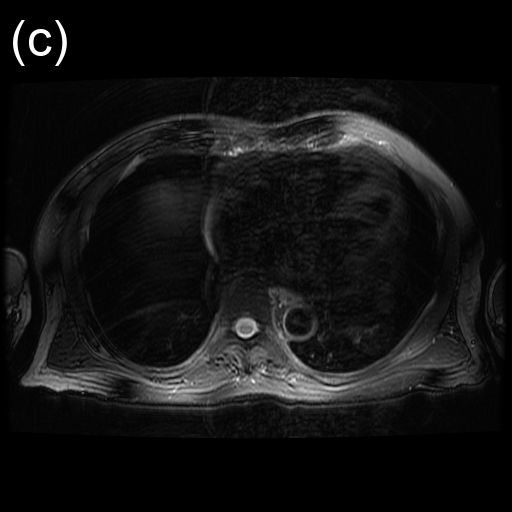

In [17]:
# 2 9 best result

image_path = paths[0][1]

print(image_path)

im = imageio.imread(image_path)
print(im.shape)

display1 = Image.fromarray(im)

display1_draw = ImageDraw.Draw(display1)

display1_draw.text((10,10), "(c)", fill="white", font=ImageFont.truetype("./fonts/arial.ttf", 50))

display(display1)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


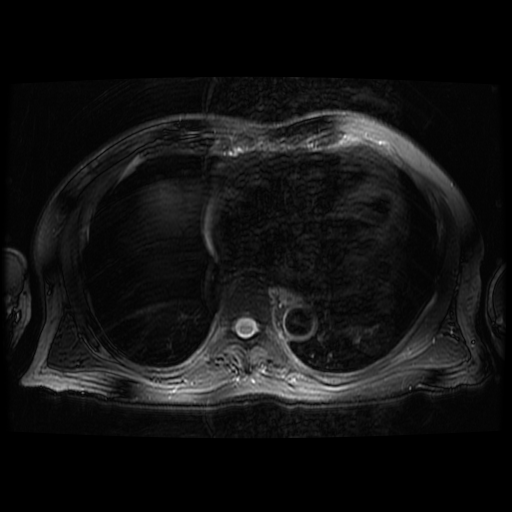

In [18]:
lf = 1200

def row_artifact(row, linear_factor):
        
    alpha = random.uniform(-1 * linear_factor, linear_factor)
    
    counter = 0
    for t in np.linspace(0, 0.002, num=row.size):
        row[counter] = row[counter] * np.exp(alpha * t )
        
        counter = counter + 1
        
    return row

def add_artifact(img, regions=[[0,511]], max_lf=500, seed=777): 
    
    random.seed(seed)
    
    for region in regions:
        
        for index in range(region[0], region[1]):
            img[index] = row_artifact(img[index], max_lf)
        
    return img

def reconstruct(img):
    
    img = np.absolute(np.fft.ifft2(img))

    img = np.around(img * 255.0 / np.max(img))
    
    return img


im_transformed = np.fft.fft2(im)

# im_converted = np.abs(im_transformed) / np.max(np.abs(im_transformed)) * 255
# im_converted = np.uint8(im_converted)
# im_transformed_display = Image.fromarray(im_converted)

# display(im_transformed_display)


im_transformed_artifacted = add_artifact(im_transformed, regions=[], max_lf=lf)

image = reconstruct(im_transformed_artifacted)
image = np.uint8(image)


print(image)

display2 = Image.fromarray(image)

# display2_draw = ImageDraw.Draw(display2)

# display2_draw.text((10,10), "(b)", fill="white", font=ImageFont.truetype("./fonts/arial.ttf", 50))

display(display2)

In [96]:
def generate_random_range(start, end, artifact_length=[0,20], gap_length=[0,100], start_ofset=[0,20]):
    
    list = []
    
    current = start + random.randint(start_ofset[0], start_ofset[1])
    
    while current < end:
        
        increment = random.randint(artifact_length[0], artifact_length[1])
        
        if (current + increment > end):
            list.append([current, end])
            return list
        else:
            list.append([current, current + increment])
        
        current = current + increment + random.randint(gap_length[0], gap_length[1])
        
    return list
        
        
print(generate_random_range(0, 511))  

[[12, 12], [47, 62], [107, 123], [204, 219], [239, 243], [284, 286], [322, 330], [368, 381], [401, 418], [493, 507]]


data/data_relabeled_png_synthetic/0
data/data_relabeled_png_synthetic/1
data/data_relabeled_png_synthetic/2
(512, 512)
[[11, 46], [115, 146], [161, 197], [303, 328], [392, 404], [488, 499]]
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


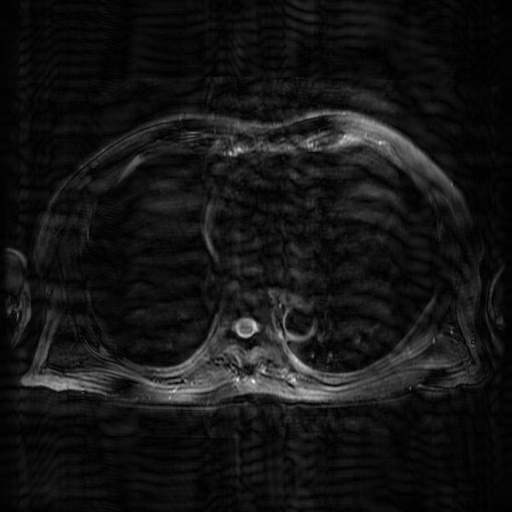

In [119]:
paths = load_image_paths(data_root)

image_path = paths[0][1]
im = imageio.imread(image_path)
print(im.shape)

im_transformed = np.fft.fft2(im)

# im_converted = np.abs(im_transformed) / np.max(np.abs(im_transformed)) * 255
# im_converted = np.uint8(im_converted)
# im_transformed_display = Image.fromarray(im_converted)

# display(im_transformed_display)


vals = generate_random_range(0, 511, artifact_length=[10,40], gap_length=[0,150], start_ofset=[0,20])
print(vals)

im_transformed_artifacted = add_artifact(im_transformed, regions=vals, max_lf=1200)

image = reconstruct(im_transformed_artifacted)
image = np.uint8(image)


print(image)

display3 = Image.fromarray(image)
display(display3)